In [131]:
import pandas as pd
import scipy
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import sddk
import tempun

In [134]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

figpath = "SDAM_data/social_diversity/socdiv_figures/"

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")
    s.write_file(figpath + fig_name + ".png", fig)

In [2]:
LIRE = gpd.read_parquet("../data/large_data/LIRE_occupsorgs_cats.parquet")
LIRE.head(5)

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,medium_city_dist,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats
0,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"['Agios Athanasios', 'Photike']",313,,"['Augusti/Augustae', 'litterae erasae', 'ordo ...",tituli honorarii,...,37687.28,31,"[20.787767, 39.546432]",10725.84,rural,[],0,[],0,[]
1,EDCS-03300852,"AE 1995, 01409",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",276,to 276; b: 276 to 282 \n\n,"['Augusti/Augustae', 'miliaria', 'viri']",miliaria,...,23430.85,73,"[22.336587, 37.462155]",7876.09,large,[],0,[],0,[]
2,EDCS-28500283,"CIL 03, 07251 = D 00214 = NDIEC-07, p 81 = AE ...",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",50,,"['Augusti/Augustae', 'leges', 'viri']",leges,...,23430.85,73,"[22.336587, 37.462155]",7876.09,large,[],0,[],0,[]
3,EDCS-09400671,"CIMRM-02, 02350 = IG-12, 00274 = Andros 00124 ...",Achaia,Achaia,Andros,Andros,209,,"['litterae erasae', 'tituli sacri']",tituli sacri,...,60414.04,47,"[24.34625, 37.633122]",47547.59,rural,[],0,[],0,[]
4,EDCS-24600769,"AE 1995, 01407 = AE 2001, 01812",Achaia,Achaia,Archea Olimpia / Archaia Olympia / Olympia,"['Archea Olimpia', 'Archaia Olympia', 'Olympia']",96,,{ },{ },...,45272.69,35,"[21.435443, 37.827452]",26125.55,rural,[],0,[],0,[]


In [4]:
LIRE[LIRE["occups_cats"].apply(lambda x: len(x) > 0)].head(5)

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,medium_city_dist,small_city_ID,small_city_geo,small_city_dist,urban_context_alt,occups,occups_N,organizations,organizations_N,occups_cats
53,EDCS-27800728,"CIL 03, 07286 (p 2316,37) = CLE 01511 = InscrA...",Achaia,Achaia,Athens / Athinai / Athenae,"['Athens', 'Athinai', 'Athenae']",161,,"['Augusti/Augustae', 'carmina', 'milites', 'of...",carmina,...,36224.02,38,"[23.737382, 37.916867]",7585.86,large,[poeta],1,[],0,"[Professional, technical and related workers]"
108,EDCS-32001657,"Corinth-08-03, 00156",Achaia,Achaia,Corinth / Korinthos / Corinthus,"['Corinth', 'Korinthos', 'Corinthus']",50,,sacerdotes pagani,{ },...,23062.42,78,"[22.548344, 38.043207]",33094.02,large,[faber],1,[],0,"[Production and related workers, transport equ..."
109,EDCS-32001664,"Corinth-08-03, 00164",Achaia,Achaia,Corinth / Korinthos / Corinthus,"['Corinth', 'Korinthos', 'Corinthus']",150,,{ },{ },...,23062.42,78,"[22.548344, 38.043207]",33094.02,large,[curator],1,[],0,[Administrative and managerial workers]
115,EDCS-09701686,"ILGR 00094 = AE 1968, 00474 = AE 1972, 00567",Achaia,Achaia,Corinth / Korinthos / Corinthus,"['Corinth', 'Korinthos', 'Corinthus']",200,,{ },{ },...,23062.42,78,"[22.548344, 38.043207]",33094.02,large,[curator],1,[],0,[Administrative and managerial workers]
122,EDCS-08200632,"CIL 03, 00567 (p 987) = CIL 03, 07303 = CIG 01...",Achaia,Achaia,Delphoi / Delphi,"['Delphoi', 'Delphi']",110,,{ },{ },...,41669.39,29,"[22.5, 38.483333]",684.49,small,[navigans],1,[],0,"[Production and related workers, transport equ..."


In [56]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset
# takes approx. 90 seconds in Google colab
LIRE["random_dates"] = LIRE.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=1000, seed=row.name), axis=1)

CPU times: user 28.4 s, sys: 1.19 s, total: 29.5 s
Wall time: 30 s


In [7]:
# generate a dictionary of occupations by type
occupations_df = pd.read_csv("../data/occupations_list_hisco.csv")

def term1_plus_term2(row):
    term1_2 = row["Term"]
    if isinstance(row["Term2"], str):
        term1_2 += " " + row["Term2"]
    return term1_2

occupations_df["Term"] = occupations_df.apply(lambda row: term1_plus_term2(row), axis=1)

In [8]:
occups_cats_dict = dict(zip(occupations_df["Term"], occupations_df["HISCO_majorgroup"]))

In [9]:
occups_cats_dict

{'abetarius': 8.0,
 'abietarius': 8.0,
 'acceptor': 3.0,
 'accomodator': 9.0,
 'aceptor': 3.0,
 'aciarius': 7.0,
 'aciscularius': 9.0,
 'acuarius': 8.0,
 'acuclarius': 8.0,
 'acucularius': 8.0,
 'acutarius': 8.0,
 'acutiator': 6.0,
 'adplumbator': 7.0,
 'adulterator': 3.0,
 'aedifex': 0.0,
 'aedificator': 0.0,
 'aeneator': 1.0,
 'aequator monetae': 3.0,
 'aerarius': 8.0,
 'agricola': 6.0,
 'agrimensor': 0.0,
 'agrimesor': 0.0,
 'albarius': 9.0,
 'alicarius': 6.0,
 'allecarius': 6.0,
 'aluminarius': 7.0,
 'ampullarius': 8.0,
 'anabolicarius': 9.0,
 'anaglitarius': 1.0,
 'anaglypharius': 1.0,
 'anaglyptarius': 1.0,
 'anellarius': 8.0,
 'annellarius': 8.0,
 'annonarius': 3.0,
 'anularius': 8.0,
 'apothecarius': 4.0,
 'apparator': 9.0,
 'applumbator': 7.0,
 'aquarius': 9.0,
 'aquator': 9.0,
 'arcarius': 3.0,
 'archimagirus': 5.0,
 'architecton': 0.0,
 'architectus': 0.0,
 'arcuarius': 3.0,
 'arcularius': 8.0,
 'arecarius': 0.0,
 'arenarius': 1.0,
 'argentarius': 8.0,
 'armamentarius': 5.0,

In [10]:
def cat_for_occup(list_of_occups):
    try:
        return [occups_cats_dict[occup] for occup in list_of_occups]
    except:
        return []
LIRE["occups"] = LIRE["occups"].apply(list)
LIRE["occups_cats_hisco"] = LIRE["occups"].apply(cat_for_occup)

In [36]:
# what is the mean HISCO value over the dataset as a whole?
np.mean([el for sublist in LIRE["occups_cats_hisco"].tolist() for el in sublist if el >= 0])

4.691717791411043

In [47]:
def get_mean_hisco(df):
    hisco_values_list = [el for sublist in df["occups_cats_hisco"].tolist() for el in sublist if el >= 0]
    hisco_desc_dict = {"mean" : np.mean(hisco_values_list), "median" : np.median(hisco_values_list), "std" : np.std(hisco_values_list), "values" : hisco_values_list}
    return hisco_desc_dict

In [48]:
get_mean_hisco(LIRE)

{'mean': 4.691717791411043,
 'median': 4.0,
 'std': 3.151476252594181,
 'values': [1.0,
  9.0,
  2.0,
  2.0,
  9.0,
  2.0,
  8.0,
  9.0,
  2.0,
  2.0,
  8.0,
  7.0,
  4.0,
  4.0,
  7.0,
  8.0,
  4.0,
  9.0,
  9.0,
  8.0,
  2.0,
  9.0,
  3.0,
  2.0,
  2.0,
  0.0,
  9.0,
  8.0,
  8.0,
  2.0,
  9.0,
  3.0,
  3.0,
  9.0,
  9.0,
  8.0,
  7.0,
  4.0,
  9.0,
  3.0,
  8.0,
  9.0,
  8.0,
  9.0,
  9.0,
  5.0,
  9.0,
  5.0,
  9.0,
  5.0,
  5.0,
  5.0,
  2.0,
  5.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  8.0,
  2.0,
  1.0,
  1.0,
  6.0,
  4.0,
  2.0,
  0.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  1.0,
  8.0,
  6.0,
  2.0,
  5.0,
  5.0,
  8.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  8.0,
  2.0,
  2.0,
  2.0,
  2.0,
  7.0,
  8.0,
  2.0,
  0.0,
  4.0,
  8.0,
  7.0,
  0.0,
  0.0,
  9.0,
  2.0,
  2.0,
  8.0,
  4.0,
  2.0,
  1.0,
  1.0,
  9.0,
  9.0,
  1.0,
  1.0,
  2.0,
  0.0,
  9.0,
  7.0,
  9.0,
  9.0,
  3.0,
  3.0,
  9.0,
  9.0,
  4.0,
  0.0,
  0.0,
  7.0,
  9.0,
  6.0,
  8.0,
  9.0,
  2.0,
  9.0,
  9.0,
  

In [98]:
hisco_large = get_mean_hisco(LIRE[LIRE["urban_context_alt"]=="large"])
hisco_medium = get_mean_hisco(LIRE[LIRE["urban_context_alt"]=="medium"])
hisco_small = get_mean_hisco(LIRE[LIRE["urban_context_alt"]=="small"])
hisco_rural = get_mean_hisco(LIRE[LIRE["urban_context_alt"]=="rural"])

In [122]:
print(hisco_large["mean"])
print(hisco_medium["mean"])
print(hisco_small["mean"])
print(hisco_rural["mean"])

4.28437654016757
4.739984289080911
4.925988225399496
5.362758620689656


In [118]:
np.round(scipy.stats.mannwhitneyu(hisco_large["values"], hisco_medium["values"]).pvalue, 4)

0.0001

In [120]:
np.round(scipy.stats.mannwhitneyu(hisco_medium["values"], hisco_small["values"]).pvalue, 4)

0.3055

In [121]:
np.round(scipy.stats.mannwhitneyu(hisco_small["values"], hisco_rural["values"]).pvalue, 4)

0.0327

In [123]:
# various metrics on the level of timeblocks
def unique_occups_ratio(timeblock_df):
    hisco_mean = get_mean_hisco(timeblock_df)["mean"]
    return hisco_mean

In [68]:
hisco_timeblocks = tempun.sim_data_by_function(LIRE, 100, [-50, 350, 100], unique_occups_ratio)

In [69]:
hisco_timeblocks

[[((-50, 49), 4.9351927809680065),
  ((51, 150), 4.808913308913309),
  ((151, 250), 4.5127786840674275),
  ((251, 350), 4.200483091787439)],
 [((-50, 49), 4.974958263772955),
  ((51, 150), 4.749696233292831),
  ((151, 250), 4.4994565217391305),
  ((251, 350), 4.374418604651162)],
 [((-50, 49), 4.901408450704225),
  ((51, 150), 4.854090354090354),
  ((151, 250), 4.462465753424658),
  ((251, 350), 4.279342723004695)],
 [((-50, 49), 4.972861842105263),
  ((51, 150), 4.852300242130751),
  ((151, 250), 4.423097974822113),
  ((251, 350), 4.338271604938272)],
 [((-50, 49), 4.97093023255814),
  ((51, 150), 4.745532963647566),
  ((151, 250), 4.548648648648649),
  ((251, 350), 4.208333333333333)],
 [((-50, 49), 4.927512355848435),
  ((51, 150), 4.8399503722084365),
  ((151, 250), 4.489487870619946),
  ((251, 350), 4.2459396751740135)],
 [((-50, 49), 4.964869281045751),
  ((51, 150), 4.763141620284477),
  ((151, 250), 4.516477579686656),
  ((251, 350), 4.287769784172662)],
 [((-50, 49), 4.9739413

In [70]:
hisco_timeblocks[0]

[((-50, 49), 4.9351927809680065),
 ((51, 150), 4.808913308913309),
 ((151, 250), 4.5127786840674275),
 ((251, 350), 4.200483091787439)]

(3.0, 7.0)

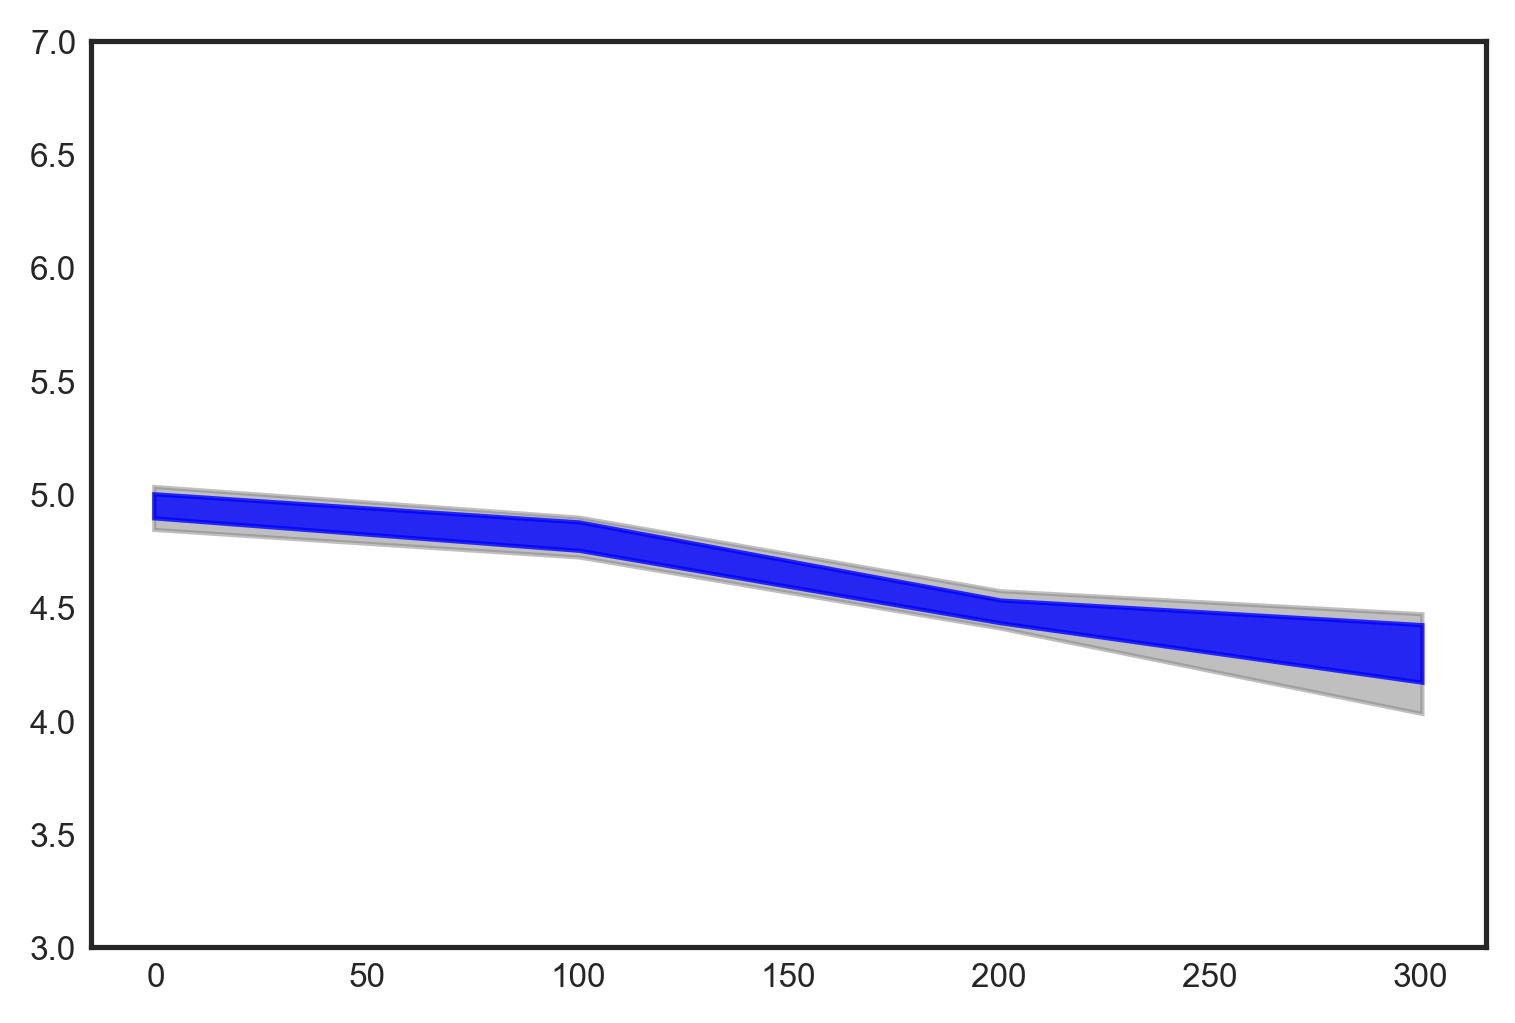

In [127]:
fig, ax = plt.subplots()
tempun.plot_timeblocks_data(hisco_timeblocks, ax, "blue", label="occups", alpha=0.8)
ax.set_ylim(3, 7)

In [85]:
hisco_timeblocks_large = tempun.sim_data_by_function(LIRE[LIRE["urban_context_alt"]=="large"], 100, [-50, 350, 50], unique_occups_ratio)
hisco_timeblocks_medium = tempun.sim_data_by_function(LIRE[LIRE["urban_context_alt"]=="medium"], 100, [-50, 350, 50], unique_occups_ratio)
hisco_timeblocks_small = tempun.sim_data_by_function(LIRE[LIRE["urban_context_alt"]=="small"], 100, [-50, 350, 50], unique_occups_ratio)
hisco_timeblocks_rural = tempun.sim_data_by_function(LIRE[LIRE["urban_context_alt"]=="rural"], 100, [-50, 350, 50], unique_occups_ratio)

In [86]:
datas = [hisco_timeblocks_large, hisco_timeblocks_medium, hisco_timeblocks_small, hisco_timeblocks_rural]
colors = ["darkred", "darkgreen", "darkblue","purple"]

In [93]:
reversed(range(4))

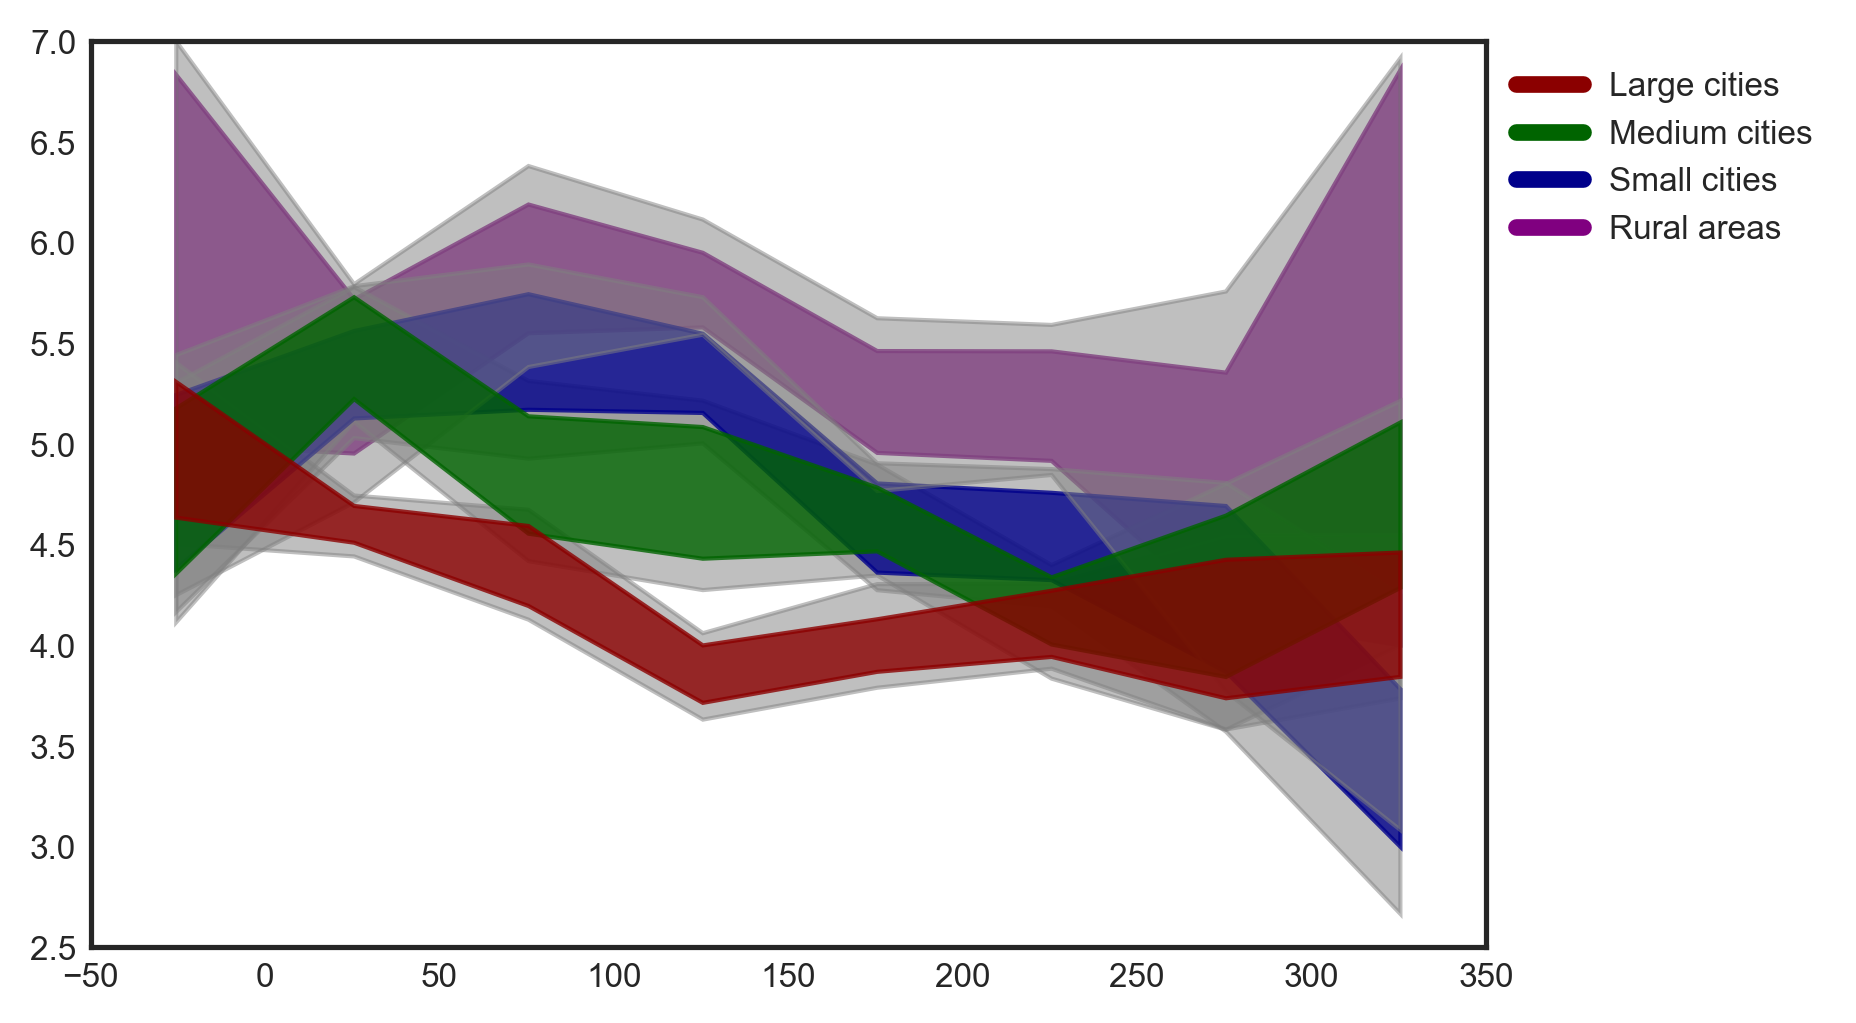

In [140]:
fig, ax = plt.subplots()
for data, color, z in zip(datas, colors, reversed(range(4))):
    tempun.plot_timeblocks_data(data, ax=ax, color=color, label="occups", alpha=0.8, zorder=z)
    ax.set_ylim([2.5,7])
    ax.set_xlim([-50,350])
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in ["darkred", "darkgreen", "darkblue", "purple"]]
ax.legend(markers, ["Large cities", "Medium cities", "Small cities", "Rural areas"], bbox_to_anchor=(1,1), loc='upper left')

In [132]:
s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")

connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [141]:
save_figure(fig, "hisco_by_context&time")

A file with the same name ("hisco_by_context&time.png") already exists in this location.
Your <class 'matplotlib.figure.Figure'> object has been succesfully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/hisco_by_context&time.png"


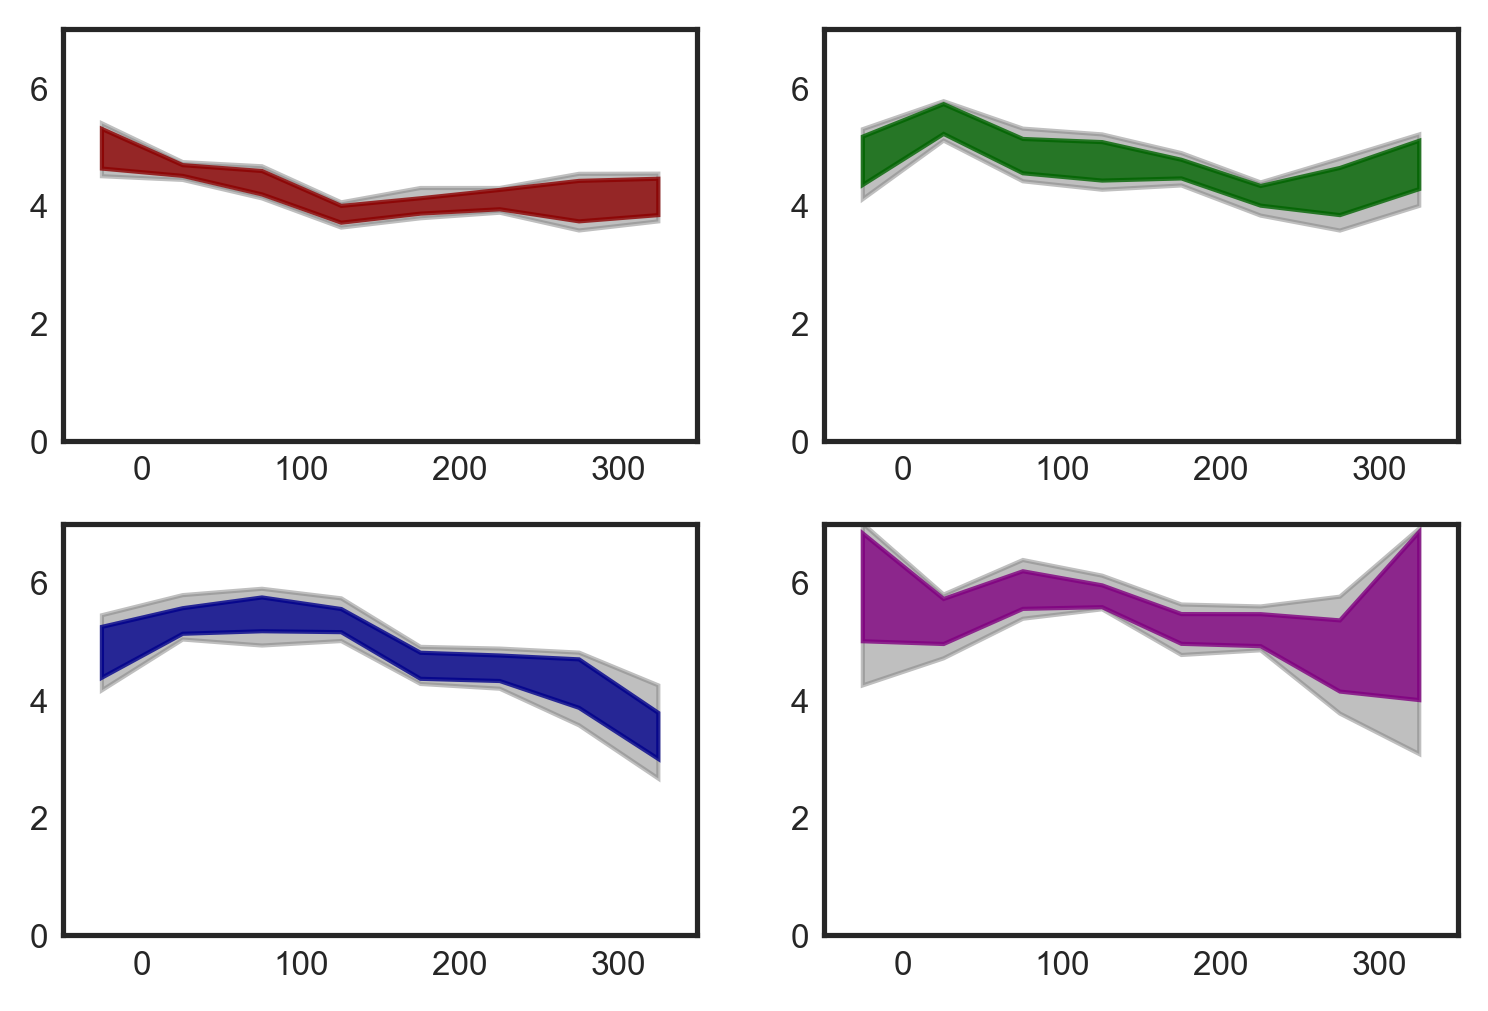

In [136]:
fig, axs = plt.subplots(2,2)
for ax, data, color in zip(axs.ravel(), datas, colors):
    tempun.plot_timeblocks_data(data, ax, color, label="occups", alpha=0.8)
    ax.set_ylim([0,7])
    ax.set_xlim([-50,350])

In [137]:
save_figure(fig, "hisco_by_context&time_subplots")

Your <class 'matplotlib.figure.Figure'> object has been succesfully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/social_diversity/socdiv_figures/hisco_by_context&time_subplots.png"
